In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [3]:
tr = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
ts = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

# Analysis of Data Set

In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
tr.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Number of columns control according to data type.

dt_count = tr.dtypes.value_counts()
print(f"Number of Columns by Data Types: \n{dt_count}")

Number of Columns by Data Types: 
object     43
int64      35
float64     3
Name: count, dtype: int64


In [7]:
#To get a deeper insight into the data set, I examine the unique values and how many values there are in total.
# Group columns according to data types.

float_col = tr.select_dtypes(include = ["float64"]).columns
int_col = tr.select_dtypes(include = ["int64"]).columns
obj_col = tr.select_dtypes(include = ["object"]).columns

# Printing columns of type Float64.

print("Float64 Columns:")
for col in float_col:
    unq = tr[col].unique()
    miss = tr[col].isnull().sum()
    print(f"{col} - ({len(unq)}) Unique Values | ({miss}) Missing Value")
print("\n" + "-"*50)


# Printing columns of type Int64.

print("Int64 Columns:")
for col in int_col:
    unq = tr[col].unique()
    miss = tr[col].isnull().sum()
    print(f"{col} - ({len(unq)}) Unique Values | ({miss}) Missing Value")
print("\n" + "-"*50)


# Printing columns of type Object.

print("Object Columns:")
for col in obj_col:
    unq = tr[col].unique()
    miss = tr[col].isnull().sum()
    print(f"{col} - ({len(unq)}) Unique Values | ({miss}) Missing Value")

Float64 Columns:
LotFrontage - (111) Unique Values | (259) Missing Value
MasVnrArea - (328) Unique Values | (8) Missing Value
GarageYrBlt - (98) Unique Values | (81) Missing Value

--------------------------------------------------
Int64 Columns:
Id - (1460) Unique Values | (0) Missing Value
MSSubClass - (15) Unique Values | (0) Missing Value
LotArea - (1073) Unique Values | (0) Missing Value
OverallQual - (10) Unique Values | (0) Missing Value
OverallCond - (9) Unique Values | (0) Missing Value
YearBuilt - (112) Unique Values | (0) Missing Value
YearRemodAdd - (61) Unique Values | (0) Missing Value
BsmtFinSF1 - (637) Unique Values | (0) Missing Value
BsmtFinSF2 - (144) Unique Values | (0) Missing Value
BsmtUnfSF - (780) Unique Values | (0) Missing Value
TotalBsmtSF - (721) Unique Values | (0) Missing Value
1stFlrSF - (753) Unique Values | (0) Missing Value
2ndFlrSF - (417) Unique Values | (0) Missing Value
LowQualFinSF - (24) Unique Values | (0) Missing Value
GrLivArea - (861) Unique 

In [8]:
# I print by setting a limit to identify columns with too many empty values.

miss_ratio = tr.isnull().mean()*100
high_miss_col = miss_ratio[miss_ratio > 80]
high_miss = miss_ratio[miss_ratio > 80].index.tolist()
print("Columns That Have High Missing Value:\n", high_miss_col)

Columns That Have High Missing Value:
 Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [9]:
# I also identify columns with Low Variance.

low_variance = [col for col in tr.columns if tr[col].nunique() <= 1]
print("Low Variance Columns:", low_variance)

Low Variance Columns: []


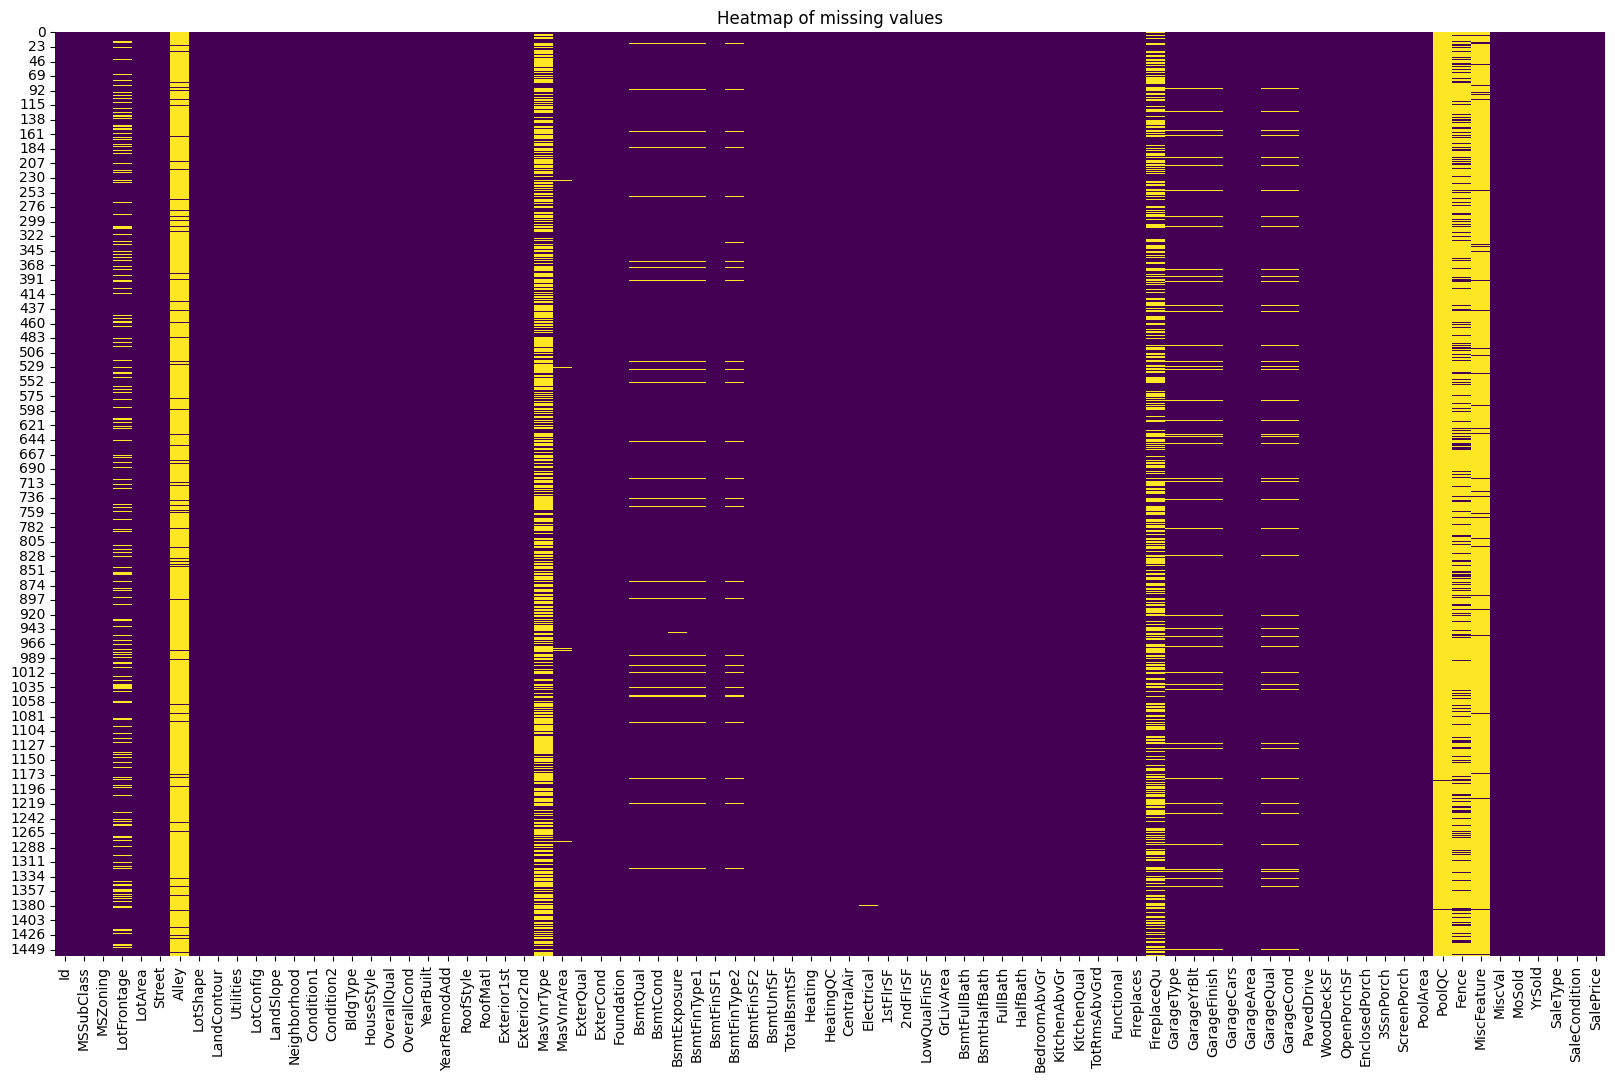

In [10]:
# Finally, I check for null values with the heatmap and check the density of columns with null values.

plt.figure(figsize=(20, 12))
sns.heatmap(tr.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of missing values")
plt.show()

# Data Manipulation

## Data Cleaning

In [11]:
# I removed the columns from the dataset whose data we can already get from other columns. 
# I also set a limit on the columns that have too much missing data from the dataset and weeded out the ones above the limit. 
# Then I identified the columns with more missing data than a heat map and checked the importance of these columns. 
# Then I removed the columns I identified. In this way, I aim to reduce the processing intensity. 

tr.drop(columns = high_miss + ["MasVnrType", "FireplaceQu", "GarageFinish", "YearRemodAdd", "LowQualFinSF", "GarageCars", "LandSlope", "Exterior1st", "Exterior2nd", "BsmtFinType1", "BsmtFinType2", "BsmtFinSF1", "BsmtFinSF2"], inplace = True)

## Checking the Data Set

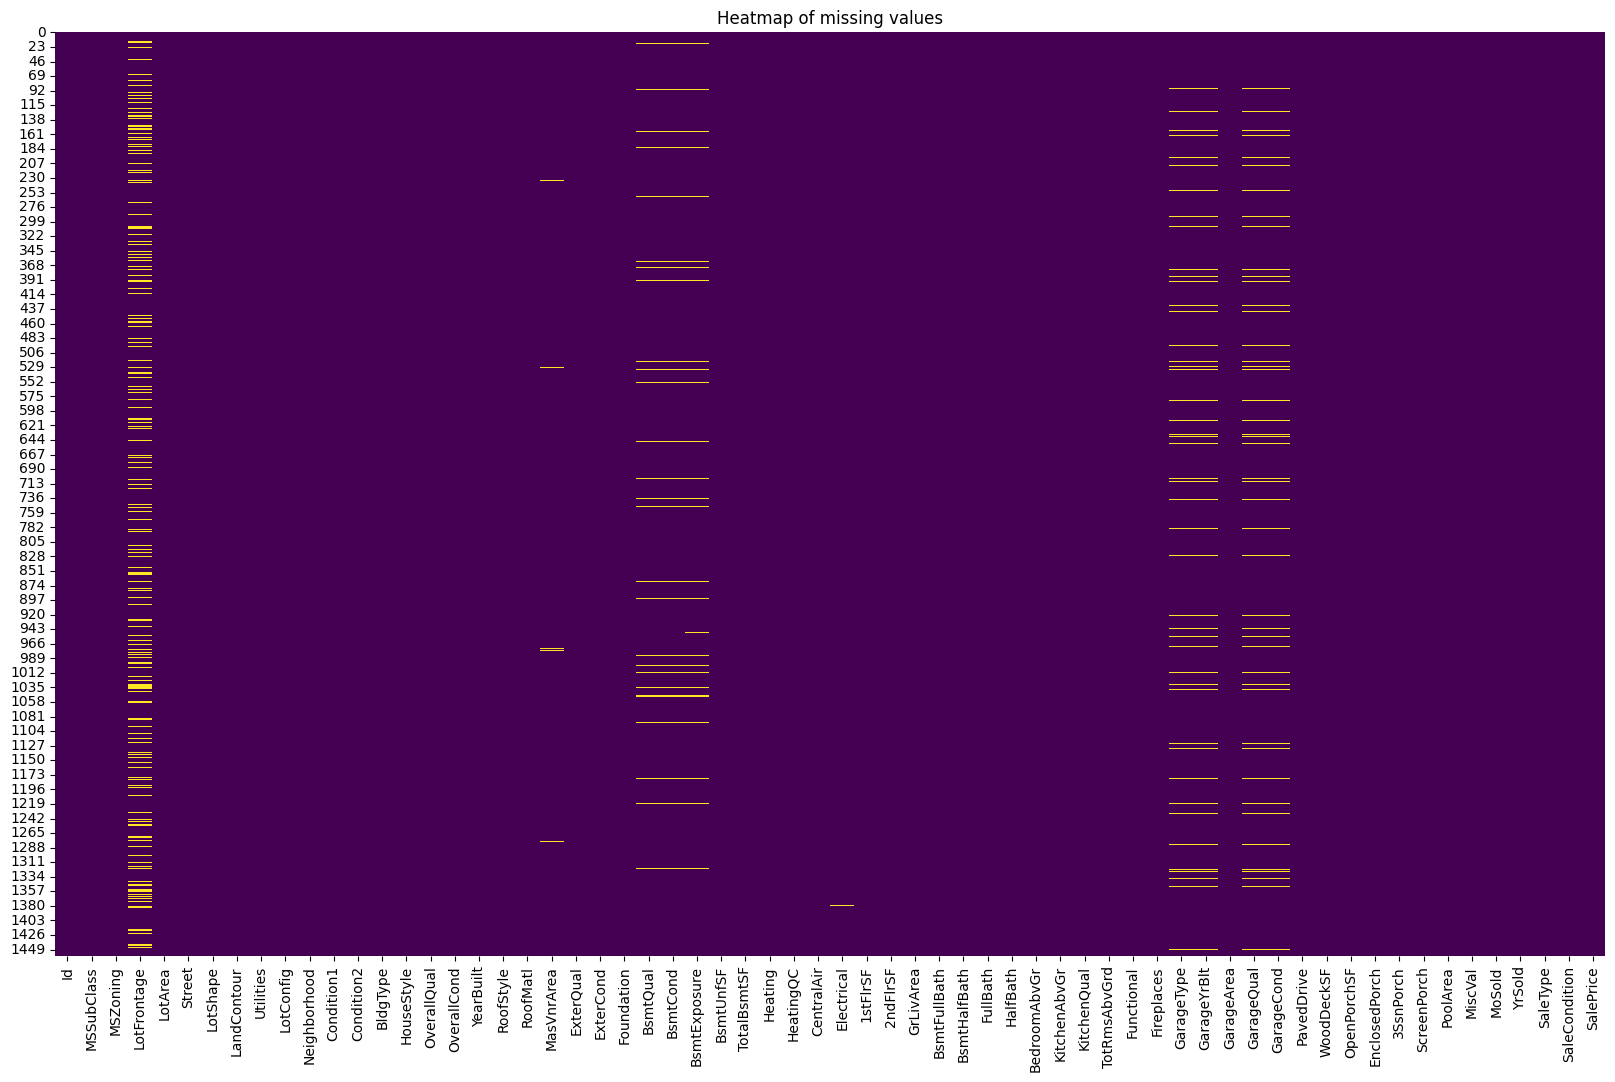

In [12]:
# I'm doing a general check of the data with the heat map again.

plt.figure(figsize=(20, 12))
sns.heatmap(tr.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of missing values")
plt.show()

In [13]:
# To ensure optimal encoding, we re-examine the object columns with their unique values. 
# Choosing the appropriate encoding method to the appropriate column will improve the performance of our model.

for col in tr.select_dtypes(include=['object']).columns:
    unique_values = tr[col].unique()
    print(f"📌 {col}: ({len(unique_values)}) Unique Values")
    print(unique_values)
    print("-" * 50)

📌 MSZoning: (5) Unique Values
['RL' 'RM' 'C (all)' 'FV' 'RH']
--------------------------------------------------
📌 Street: (2) Unique Values
['Pave' 'Grvl']
--------------------------------------------------
📌 LotShape: (4) Unique Values
['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
📌 LandContour: (4) Unique Values
['Lvl' 'Bnk' 'Low' 'HLS']
--------------------------------------------------
📌 Utilities: (2) Unique Values
['AllPub' 'NoSeWa']
--------------------------------------------------
📌 LotConfig: (5) Unique Values
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
--------------------------------------------------
📌 Neighborhood: (25) Unique Values
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
--------------------------------------------------
📌 Condition1: (9)

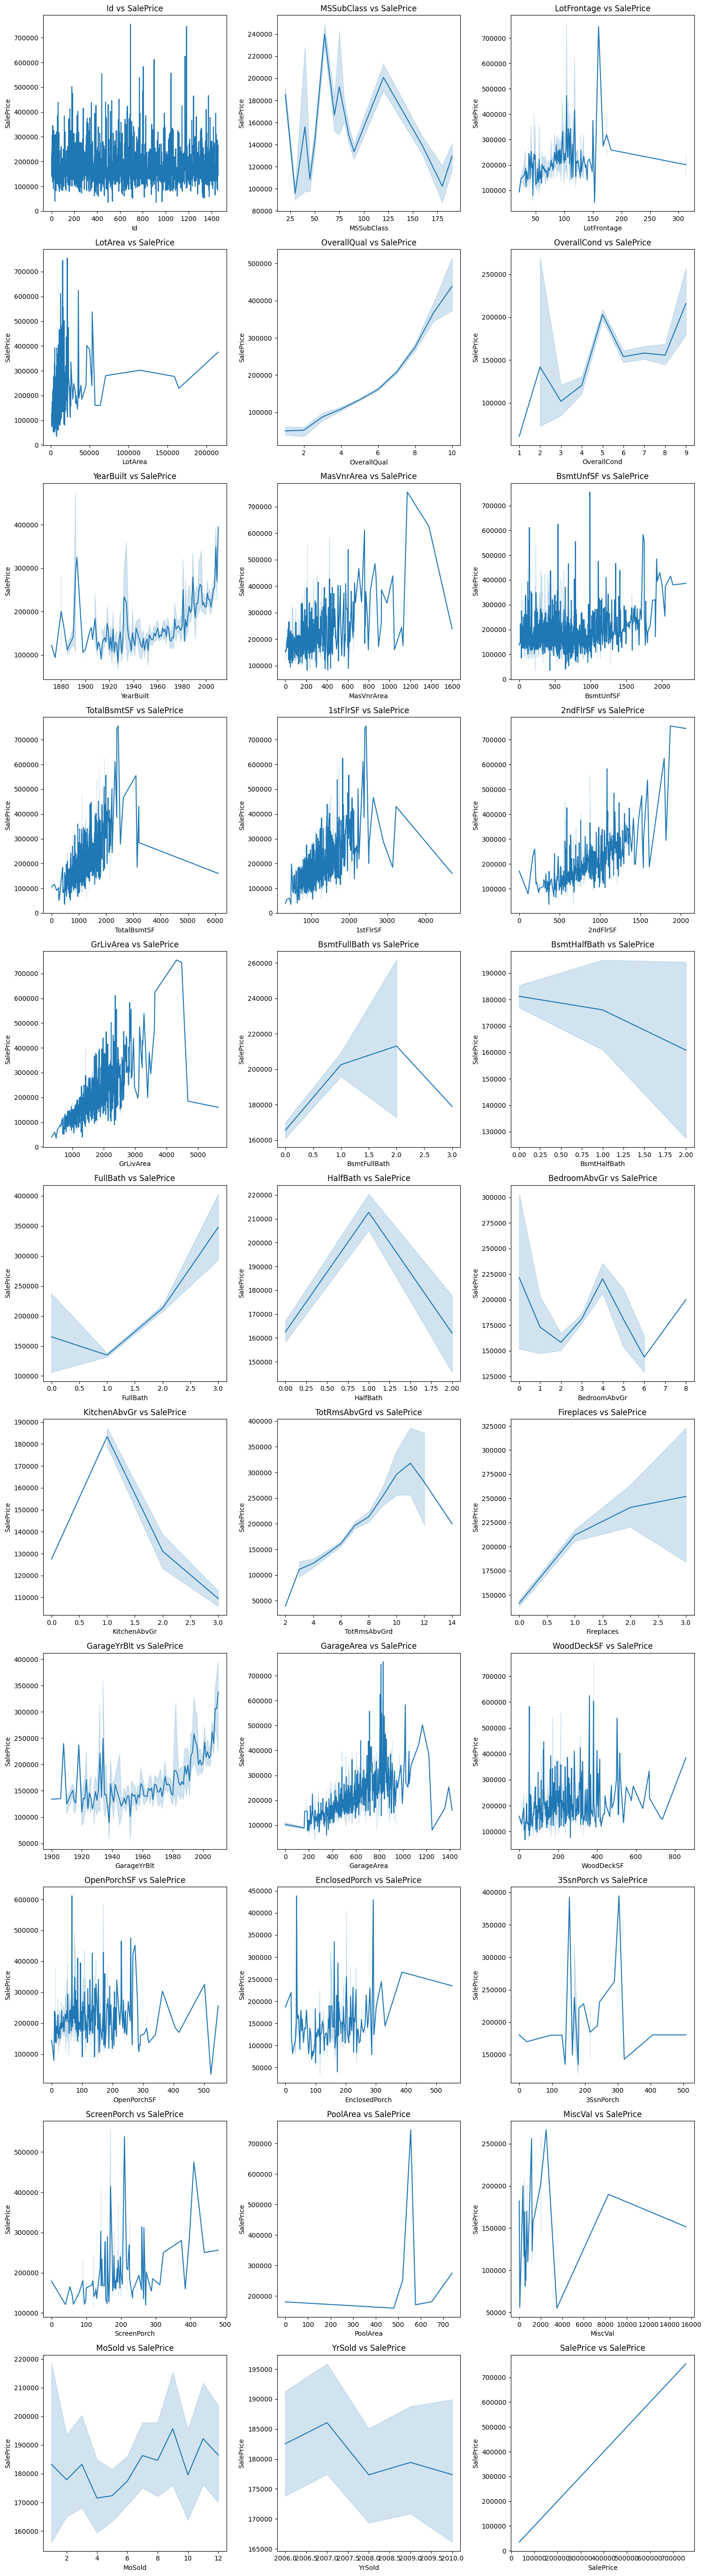

In [14]:
# To see the relationship between the SalePrice column and other numeric columns more clearly, let's examine it in a line chart.

# Let's define numeric variables.
num_cols = [col for col in tr.columns if tr[col].dtype in ['int64', 'float64']]

# I want there to be 3 columns.
# Let's create the graphs.
fig, axes = plt.subplots(nrows=len(num_cols)//3, ncols=3, figsize=(15, 5 * (len(num_cols)//3)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.lineplot(data=tr, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'{col} vs SalePrice')
    
plt.tight_layout()
plt.show()

# Filling Missing Values

Models like Random Forest or XGBoost can make robust predictions by using other variables to predict the missing value. I chose Random Forest because the Random Forest model is very good at predicting missing values. RandomForestRegressor can learn complex relationships and robustly solve the problem of missing data thanks to decision trees.



In [15]:
# Let's define numeric and categorical columns
num_cols = tr.select_dtypes(include=['number']).columns
cat_cols = tr.select_dtypes(include=['object']).columns

## Numeric Columns

### RandomForestRegreesor For Numeric Columns

In [16]:
# Fill in missing values in numeric variables.
for col in num_cols:
    if tr[col].isnull().sum() > 0:  # I only specify its application to columns with missing values.
        # Let's create the model
        rf = RandomForestRegressor(n_estimators=1000, random_state=42)
        temp_tr = tr[num_cols].dropna()  # Eksiksiz satırları kullan
        X_train = temp_tr.drop(columns=[col])
        y_train = temp_tr[col]

        # Let's train the model
        rf.fit(X_train, y_train)  
        
        # Let's predict the missing rows.
        missing_rows = tr[col].isnull()
        X_pred = tr.loc[missing_rows, num_cols].drop(columns=[col])
        print(f"X_pred missing values: {X_pred.isnull().sum().sum()}")
        imputer = SimpleImputer(strategy="median")  # I use "median" to reduce the impact of outliers.
        X_pred_imputed = pd.DataFrame(imputer.fit_transform(X_pred), columns=X_pred.columns)
        tr.loc[missing_rows, col] = rf.predict(X_pred_imputed)

X_pred missing values: 9
X_pred missing values: 0
X_pred missing values: 0


In [17]:
# Let's confirm that there are no empty values.
print(X_pred.isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
MasVnrArea       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


## Categorical Columns

### Encoding

If a column has variables that have a natural order, it is better to use the Ordinal Encoding method. I prefer to use One-Hot Encoding for non-ordered categorical variables. Therefore, I first identify the differences of the columns and then select the columns for encoding with the most appropriate method.

In [18]:
# We fill empty values in categorical variables with -999.
# The reason for doing this is that after encoding, we will make these values empty values again.
# Then we will predict the empty values.

tr[cat_cols] = tr[cat_cols].fillna("-999")

# Variables to apply "Ordinal Encoding".
ordinal_cols = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "PavedDrive": ["N", "P", "Y"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
}

# Ordinal Encoding
encoder = OrdinalEncoder(categories=list(ordinal_cols.values()), handle_unknown="use_encoded_value", unknown_value=-1)
tr[list(ordinal_cols.keys())] = encoder.fit_transform(tr[list(ordinal_cols.keys())])

# Variables to apply One-Hot Encoding.
ohe_cols = [
    "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle",
    "RoofStyle", "RoofMatl", "Foundation", "Heating", "CentralAir",
    "Electrical", "Functional", "GarageType", "SaleType", "SaleCondition"
]

# One-Hot Encoding
tr = pd.get_dummies(tr, columns=ohe_cols, drop_first=False)

print("Encoding is complete!")

Encoding is complete!


### RandomForestRegreesor For Categorical Columns

In [19]:
# Let's convert the values that we have temporarily set as -999 back to missing values to fill.
tr.replace(-999, np.nan, inplace=True)

In [20]:
# Time to fill in the missing values with Random Forrest Regressor.

missing_cols = tr.columns[tr.isnull().sum() > 0]

# Parsing to train the model with non-missing data
for col in missing_cols:
    train_data = tr[tr[col].notnull()]
    test_data = tr[tr[col].isnull()]

    # If all values are missing, it will not be possible to train the model, so let's fill it with mode.
    if train_data[col].nunique() == 1:
        tr[col].fillna(tr[col].mode()[0], inplace=True)
        continue
    
    # I specify our dependent variable to be the column with the missing value.
    X_train = train_data.drop(columns=[col])
    y_train = train_data[col]

    # The rows we want to predict
    X_test = test_data.drop(columns=[col])
    
    # Train the model
    model = RandomForestRegressor(n_estimators=1000, random_state=42)
    model.fit(X_train, y_train)

    # Predict missing values
    tr.loc[tr[col].isnull(), col] = model.predict(X_test)

print("The prediction of missing values is complete!")

The prediction of missing values is complete!


In [21]:
# Let's check it out.
tr.isnull().sum().sum()

0

# House Price Prediction

## General Checking

In [22]:
# Let's check the dataset to be predicted.
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [23]:
# Let's check the columns of the prediction dataset for encoding.

for col in ts.select_dtypes(include=['object']).columns:
    unique_values = ts[col].unique()
    print(f"📌 {col}: ({len(unique_values)}) Unique Values")
    print(unique_values)
    print("-" * 50)

📌 MSZoning: (6) Unique Values
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]
--------------------------------------------------
📌 Street: (2) Unique Values
['Pave' 'Grvl']
--------------------------------------------------
📌 Alley: (3) Unique Values
[nan 'Pave' 'Grvl']
--------------------------------------------------
📌 LotShape: (4) Unique Values
['Reg' 'IR1' 'IR2' 'IR3']
--------------------------------------------------
📌 LandContour: (4) Unique Values
['Lvl' 'HLS' 'Bnk' 'Low']
--------------------------------------------------
📌 Utilities: (2) Unique Values
['AllPub' nan]
--------------------------------------------------
📌 LotConfig: (5) Unique Values
['Inside' 'Corner' 'FR2' 'CulDSac' 'FR3']
--------------------------------------------------
📌 LandSlope: (3) Unique Values
['Gtl' 'Mod' 'Sev']
--------------------------------------------------
📌 Neighborhood: (25) Unique Values
['NAmes' 'Gilbert' 'StoneBr' 'BrDale' 'NPkVill' 'NridgHt' 'Blmngtn'
 'NoRidge' 'Somerst' 'SawyerW' 'Sawyer' 'NWAmes

## Encoding in the Data Set to be Predicted

I use the same method for encode as I used for the "tr" dataset.

In [24]:
# Filling missing values with “-999”.
cat_cols_ts = ts.select_dtypes(include=['object']).columns
ts[cat_cols_ts] = ts[cat_cols_ts].fillna("-999")

# Columns for which "Ordinal Encoding" will be applied for ts data set.
ordinal_cols_ts = {
    "ExterQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "HeatingQC": ["Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": ["Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": ["Po", "Fa", "TA", "Gd", "Ex"],
    "PavedDrive": ["N", "P", "Y"],
    "BsmtExposure": ["No", "Mn", "Av", "Gd"],
    "FireplaceQu": ["Po", "Fa", "TA", "Gd", "Ex"],
    "PoolQC": ["Fa", "TA", "Gd", "Ex"],
    "Fence": ["MnWw", "GdWo", "MnPrv", "GdPrv"]
}

# Ordinal Encoding
encoder = OrdinalEncoder(categories=list(ordinal_cols_ts.values()), handle_unknown="use_encoded_value", unknown_value=-1)
ts[list(ordinal_cols_ts.keys())] = encoder.fit_transform(ts[list(ordinal_cols_ts.keys())])

# Columns for which "One-Hot Encoding" will be applied for ts data set.
ohe_cols_ts = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl",
    "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "BsmtFinType1", "BsmtFinType2", "Heating",
    "CentralAir", "Electrical", "Functional", "GarageType", "GarageFinish", "MiscFeature", "SaleType",
    "SaleCondition"
]

# One-Hot Encoding
ts = pd.get_dummies(ts, columns=ohe_cols_ts, drop_first=False)

print("Encoding for ts dataset is complete!")

Encoding for ts dataset is complete!


In [25]:
# Let's convert the values that we have temporarily set as -999 back to missing values to fill.
ts.replace(-999, np.nan, inplace=True)

## Feature Engineering (Synchronization of tr and ts Data Sets)

In [26]:
# Let's adjust it to use the same columns for tr and ts.
missing_cols = set(tr.columns) - set(ts.columns)
extra_cols = set(ts.columns) - set(tr.columns)

# Add the missing columns to the ts data set (by filling with 0).
for col in missing_cols:
    ts[col] = 0

# Remove redundant columns from the ts dataset.
ts = ts.drop(columns=extra_cols, errors="ignore")

# Let's make the column order same.
ts = ts[tr.columns.drop("SalePrice")]  # ts does not have SalePrice column, so we remove it

## Training the Model (XGBRegressor)

In [27]:
# Now let's identify the independent (X) and dependent (y) variables in the tr data set.
X = tr.drop(columns=["SalePrice"])
y = tr["SalePrice"]

In [28]:
# Divide into training and test.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model.
model = XGBRegressor(n_estimators=2000, learning_rate=0.2, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)

# Model validation performance.
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)


## MAE

In [29]:
print(f"MAE: {mae:.2f}")

MAE: 16888.90


In [30]:
tr["SalePrice"].mean()

180921.19589041095

In [31]:
# Let's check how MAE compares to the average.
print(f"Average Sale Price / MAE = {tr['SalePrice'].mean() / mae:.2f}")

Average Sale Price / MAE = 10.71
